In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

from pprint import pprint

from functools import partial

import numpy as np
from sklearn.preprocessing import scale
import sklearn.metrics as metrics

import matplotlib.pyplot as plt
import matplotlib.animation as ani

import mlgrad.models as models
import mlgrad.regr as regr
import mlgrad.cls as cls
import mlgrad.pca as pca
import mlgrad.plots as plots
import mlgrad.funcs as funcs
import mlgrad.funcs2 as funcs2
import mlgrad.loss as loss
import mlgrad.gd as gd
import mlgrad.smooth as smooth
import mlgrad.inventory as inventory
from mlgrad.af import averaging_function
import mlgrad.avragg as avragg

import rampy
import pybaselines
import random

from irsa import io
from irsa.preprocess import despike, utils
import irsa.widgets as widgets
import irsa.spectra as spectra
import irsa.io as io

import scipy.special as special

import copy

import ipywidgets
from IPython.display import display

import sys
print(sys.version)

#%matplotlib inline

3.13.5 (main, Jun 25 2025, 18:55:22) [GCC 14.2.0]


In [31]:
d2 = spectra.SpectraCollection()
d2.load("/home/intellimath/work/spectra/spectra_9_10", "origin")

In [ ]:
# d2.save("/home/intellimath/work/spectra/spectra_9_10", "origin")

In [32]:
d2.plot_spectra()

interactive(children=(Dropdown(description='Spectra key:', layout=Layout(width='50%'), options=('20250620_SS_1…

In [33]:
d2.select_for_exclusion()

interactive(children=(Dropdown(description='Spectra key:', layout=Layout(width='50%'), options=('20250620_SS_1…

In [2]:
# d2.select_baselines(tau2=1.0e4, tau2_smooth=1.0, func=funcs.Expit(-40.0), func2_e=inventory.relative_abs_max)

In [ ]:
# d2.replace_spectra_with_corrected()

In [4]:
# d2.save("/home/intellimath/work/spectra/spectra_9_10", "rm_bl")

In [2]:
d2 = spectra.SpectraCollection()
d2.load("/home/intellimath/work/spectra/spectra_9_10", "rm_bl")

In [3]:
d2.scale_by_robust_mean()

In [4]:
d2.plot_spectra()

interactive(children=(Dropdown(description='Spectra key:', layout=Layout(width='50%'), options=('20250620_SS_1…

In [4]:
d2_sa = d2.union_by_attr_value("вид_бактерий", "SA")
d2_sa.key = "SA"
d2_sh = d2.union_by_attr_value("вид_бактерий", "SH")
d2_sh.key = "SH"
d2_ss = d2.union_by_attr_value("вид_бактерий", "SS")
d2_ss.key = "SS"

dd2 = spectra.SpectraCollection()
dd2[d2_sa.key] = d2_sa
dd2[d2_sh.key] = d2_sh
dd2[d2_ss.key] = d2_ss


In [6]:
len(dd2["SA"].y)

234

In [7]:
# d2_1.plot_pca_spectra_2d(kind="AM", alpha=0.9, newfig=True, autoshow=False)
# d2_2.plot_pca_spectra_2d(kind="AM", alpha=0.9, newfig=False, autoshow=False)
# d2_3.plot_pca_spectra_2d(kind="AM", alpha=0.9, newfig=False, autoshow=True)

In [10]:
dd2.select_for_exclusion()

interactive(children=(Dropdown(description='Spectra key:', index=1, layout=Layout(width='50%'), options=('SA',…

In [9]:
dd2.plot_spectra()

interactive(children=(Dropdown(description='Spectra key:', index=1, layout=Layout(width='50%'), options=('SA',…

In [5]:
dd2.plot_pca_spectra()

interactive(children=(Dropdown(description='Spectra key:', layout=Layout(width='50%'), options=('SA', 'SH', 'S…

In [ ]:
dd2.plot_pca_eigenvals(10)

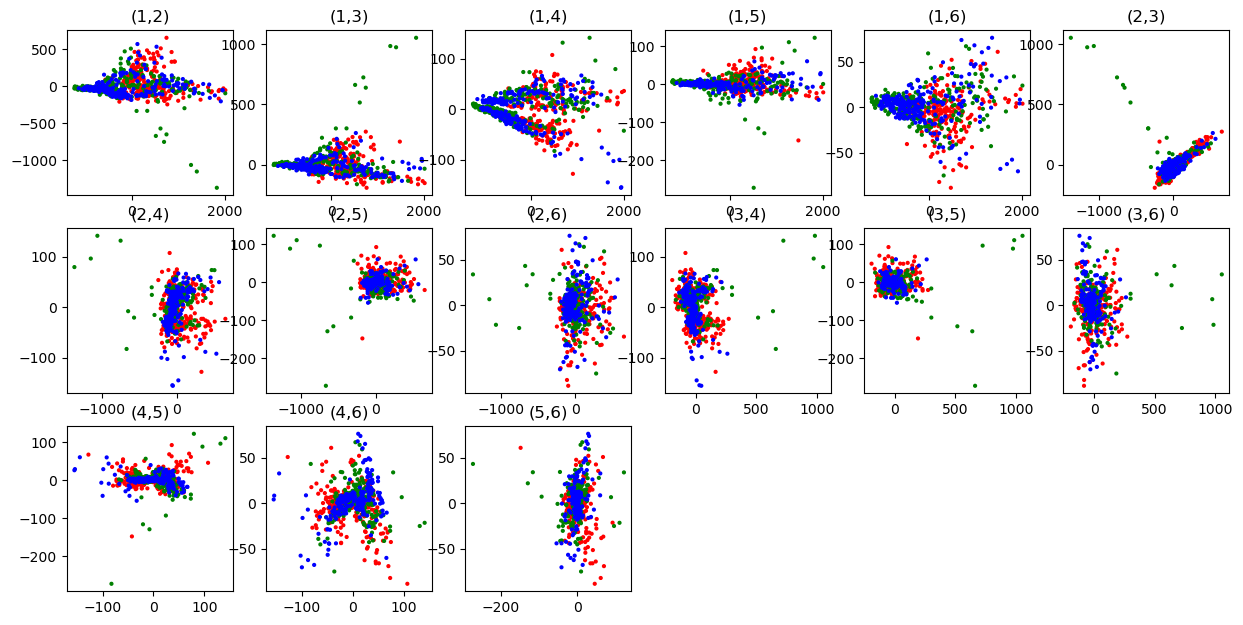

In [11]:
plt.figure(figsize=(15,15))
Ys = tuple(dd2.spectra[key].y for key in dd2.keys())
Ns = tuple(len(y) for y in Ys)
yy = np.concatenate(Ys, axis=0)
c, As, Ls = pca.find_loc_and_pc(yy, 6)
U = (yy - c) @ As.T
Cs = sum((n*[c] for n,c in zip(Ns,["r","g","b"])), start=[])
m = 1
for i in range(5):
    for j in range(i+1,6):
        plt.subplot(6,6,m)
        plt.scatter(U[:,i], U[:,j], c=Cs, s=4)
        plt.title(f"({i+1},{j+1})")
        m += 1
plt.show()

[0.070 0.042 0.084 0.124 0.100 0.101 0.112 0.066 0.099 0.099 0.055 0.036
 0.080 0.104 0.084 0.060 0.038 0.075 0.051 0.098 0.136 0.036 0.058 0.068
 0.182 0.011 0.136 0.097 0.060 0.063 0.096 0.076 0.049 0.235 0.131 0.124
 0.034 0.156 0.179 0.125 0.159 0.025 0.153 0.050 0.154 0.126 0.048 0.126
 0.056 0.117 0.111 0.026 0.110 0.098 0.080 0.048 0.060 0.062 0.026 0.087
 0.039 0.077 0.086 0.099 0.025 0.088 0.088 0.090 0.127 0.116 0.061 0.054
 0.045 0.141 0.036 0.036 0.090 0.035 0.051 0.008 0.047 0.010 0.114 0.063
 0.109 0.065 0.069 0.035 0.092 0.035 0.014 0.022 0.040 0.030 0.036 0.062
 0.033 0.030 0.045 0.072 0.010 0.062 0.116 0.046 0.094 0.051 0.075 0.084
 0.047 0.096 0.106 0.094 0.017 0.029 0.013 0.034 0.074 0.089 0.073 0.202
 0.144 0.151 0.127 0.213 0.133 0.127 0.112 0.050 0.171 0.214 0.183 0.220
 0.185 0.203 0.050 0.115 0.108 0.102 0.108 0.054 0.127 0.060 0.110 0.102
 0.030 0.075 0.052 0.026 0.041 0.089 0.038 0.052 0.034 0.157 0.094 0.039
 0.053 0.018 0.066 0.055 0.059 0.061 0.112 0.052 0.

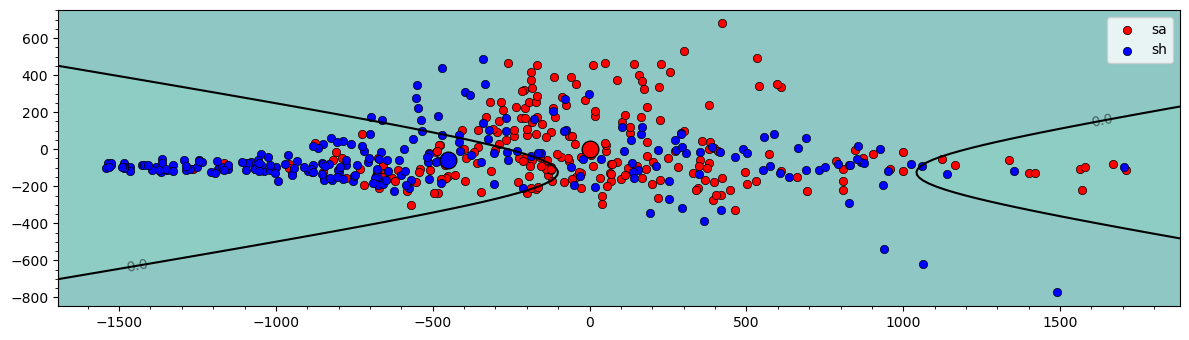

[0.054 0.053 0.011 0.050 0.052 0.078 0.047 0.075 0.057 0.060 0.062 0.076
 0.035 0.051 0.070 0.047 0.035 0.040 0.056 0.041 0.021 0.024 0.030 0.006
 0.289 0.037 0.036 0.120 0.257 0.120 0.019 0.407 0.427 0.043 0.495 0.057
 0.027 0.251 0.212 0.050 0.018 0.069 0.093 0.058 0.086 0.021 0.085 0.077
 0.049 0.010 0.018 0.054 0.040 0.038 0.024 0.094 0.066 0.055 0.069 0.020
 0.083 0.099 0.098 0.095 0.098 0.100 0.060 0.077 0.084 0.035 0.090 0.089
 0.100 0.095 0.081 0.083 0.078 0.088 0.084 0.086 0.144 0.129 0.134 0.128
 0.098 0.119 0.105 0.057 0.109 0.087 0.110 0.132 0.076 0.094 0.080 0.099
 0.075 0.097 0.084 0.107 0.121 0.148 0.128 0.125 0.171 0.122 0.115 0.028
 0.198 0.088 0.078 0.044 0.023 0.097 0.123 0.137 0.073 0.134 0.121 0.057
 0.066 0.055 0.074 0.064 0.041 0.038 0.033 0.019 0.048 0.024 0.042 0.024
 0.027 0.041 0.072 0.071 0.067 0.055 0.058 0.054 0.035 0.021 0.064 0.043
 0.063 0.040 0.079 0.090 0.093 0.111 0.080 0.091 0.116 0.061 0.092 0.101
 0.098 0.083 0.025 0.023 0.042 0.021 0.070 0.076 0.

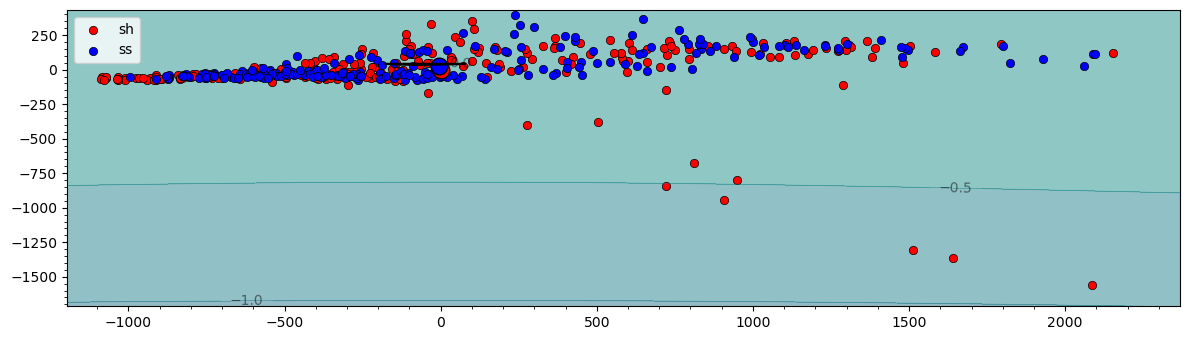

[0.069 0.082 0.054 0.068 0.061 0.060 0.048 0.052 0.072 0.072 0.040 0.072
 0.045 0.037 0.078 0.086 0.047 0.094 0.061 0.069 0.057 0.038 0.038 0.025
 0.086 0.052 0.072 0.074 0.079 0.063 0.043 0.053 0.052 0.029 0.039 0.229
 0.047 0.056 0.067 0.070 0.031 0.043 0.047 0.032 0.050 0.056 0.047 0.055
 0.051 0.045 0.042 0.037 0.051 0.046 0.046 0.042 0.044 0.034 0.057 0.052
 0.066 0.064 0.083 0.049 0.066 0.078 0.046 0.059 0.043 0.051 0.070 0.049
 0.232 0.211 0.062 0.049 0.047 0.059 0.106 0.061 0.105 0.080 0.085 0.099
 0.084 0.135 0.127 0.090 0.155 0.124 0.104 0.146 0.109 0.117 0.083 0.153
 0.088 0.115 0.145 0.125 0.052 0.051 0.065 0.083 0.056 0.072 0.082 0.037
 0.065 0.039 0.068 0.089 0.083 0.056 0.159 0.228 0.198 0.096 0.196 0.078
 0.127 0.097 0.106 0.106 0.110 0.093 0.067 0.106 0.098 0.051 0.100 0.047
 0.110 0.113 0.104 0.078 0.072 0.075 0.077 0.084 0.044 0.049 0.050 0.076
 0.078 0.043 0.077 0.078 0.082 0.069 0.064 0.069 0.067 0.065 0.074 0.069
 0.060 0.072 0.058 0.074 0.043 0.071 0.031 0.066 0.

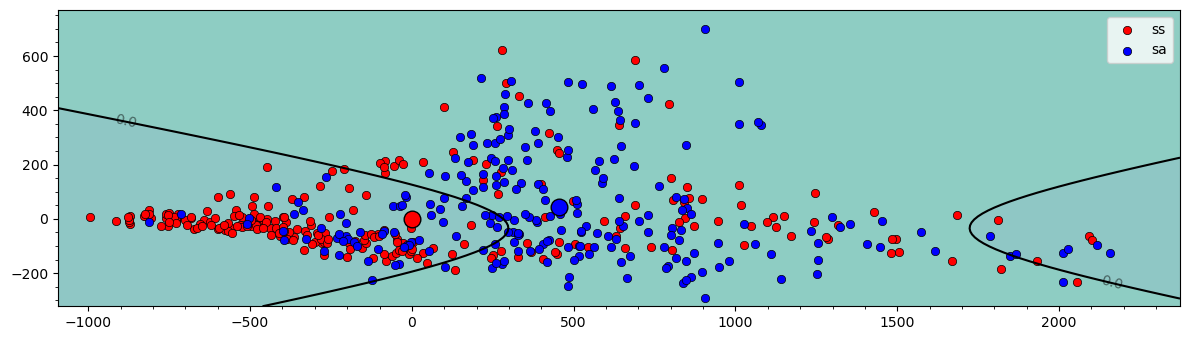

In [12]:
from irsa.analytics.pca import pca_compare

ys_sa = np.concatenate(
    tuple(d2.select_y_by_attr_value("вид_бактерий", "SA")), axis=0)
ys_ss = np.concatenate(
    tuple(d2.select_y_by_attr_value("вид_бактерий", "SS")), axis=0)
ys_sh = np.concatenate(
    tuple(d2.select_y_by_attr_value("вид_бактерий", "SH")), axis=0)

pca_compare(ys_sa, ys_sh, "sa", "sh", 0.975)
pca_compare(ys_sh, ys_ss, "sh", "ss", 0.975)
pca_compare(ys_ss, ys_sa, "ss", "sa", 0.975)


In [14]:
import mlgrad.models as models
import mlgrad.funcs as funcs
import mlgrad.funcs2 as funcs2
import mlgrad.loss as loss

import mlgrad.cls as cls
import mlgrad.af as af

zs_sa = np.ones(ys_sa.shape[0], "d")
zs_sh = -np.ones(ys_sh.shape[0], "d")
zs_sa = np.ones(ys_sa.shape[0], "d")
zs_ss = -np.ones(ys_ss.shape[0], "d")

# print(ys36.shape, zs36.shape)
# print(ys95.shape, zs95.shape)

ys_sa_sh = np.concatenate((ys_sa,ys_sh), axis=0)
zs_sa_sh = np.concatenate((zs_sa,zs_sh), axis=0)
ys_sa_sh = np.ascontiguousarray(ys_sa_sh, dtype="d")
zs_sa_sh = np.ascontiguousarray(zs_sa_sh, dtype="d")

ys_sa_ss = np.concatenate((ys_sa,ys_ss), axis=0)
zs_sa_ss = np.concatenate((zs_sa,zs_ss), axis=0)
ys_sa_ss = np.ascontiguousarray(ys_sa_ss, dtype="d")
zs_sa_ss = np.ascontiguousarray(zs_sa_ss, dtype="d")

In [ ]:

# print(ys.shape, zs.shape)

# body = models.FFNetworkModel()
# body.add(models.LinearLayer(ys.shape[1], 100))
# body.add(models.ScaleLayer(funcs.Logistic(1.0), 100))
# head = models.LinearModel(100)
# nnmod = models.FFNetworkFuncModel(head, body)
# nnmod.allocate()
# nnmod.init_param()

mod = models.SigmaNeuronModel(funcs.Sigmoidal(1.0), ys.shape[1])
mod.allocate()
mod.init_param()

In [ ]:
alg = cls.classification_as_regr(ys, zs, mod, regnorm=funcs2.AbsoluteNorm(),
                                 normalizer=gd.Masked(mod.n_param, 1.0e-5), 
                                 h=0.001, tau=0.01, n_iter=5000)

plt.figure(figsize=(10,3))
plt.plot(alg.lvals)
plt.show()

from sklearn.metrics import accuracy_score
print(accuracy_score(zs, np.sign(mod.evaluate(ys))))

In [ ]:
param = np.asarray(mod.param[1:])
print(param[0])
param_p = param.copy()
param_m = param.copy()
param_p[param < 0] = 0
param_m[param > 0] = 0
plt.figure(figsize=(10,5))
plt.plot(ys36.mean(axis=0), label="36")
plt.plot(ys95.mean(axis=0), label="95")
plt.vlines(range(ys.shape[1]), 10*param_m, 10*param_p, color='k')
plt.show()

In [ ]:
plots.plot_cls_function(mod, ys, zs)

In [27]:
mod2 = models.SigmaNeuronModel(funcs.ModSigmoidal(1.0), ys_sa_ss.shape[1])
mod2.allocate()
mod2.init_param()

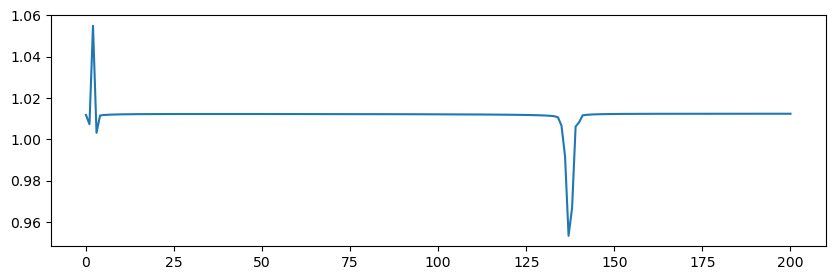

0.5253164556962026


In [28]:
alg2 = cls.classification_as_regr(ys_sa_ss, zs_sa_ss, mod2, regnorm=funcs2.AbsoluteNorm(),
                                 # normalizer=gd.Masked(mod2.n_param, 1.0e-5), 
                                 h=0.01, tau=0.0, n_iter=5000)

plt.figure(figsize=(10,3))
plt.plot(alg2.lvals)
plt.show()

from sklearn.metrics import accuracy_score
print(accuracy_score(zs_sa_ss, np.sign(mod2.evaluate(ys_sa_ss))))

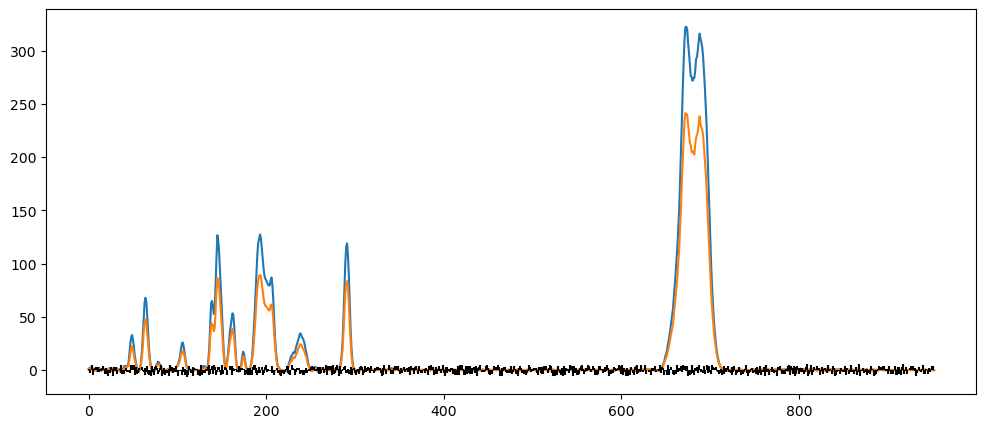

In [30]:
param2 = np.asarray(mod2.param[1:])
param2_p = param2.copy()
param2_m = param2.copy()
param2_p[param2 < 0] = 0
param2_m[param2 > 0] = 0
plt.figure(figsize=(12,5))
plt.plot(ys_sa.mean(axis=0))
plt.plot(ys_ss.mean(axis=0))
plt.vlines(range(ys_sa_ss.shape[1]), 10*param2_m, 10*param2_p, color='k')
plt.show()

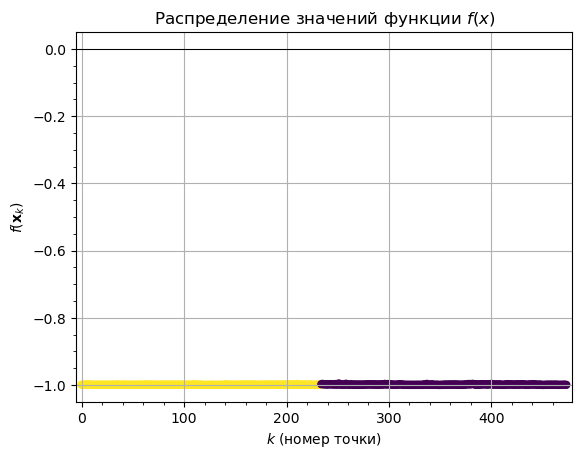

In [26]:
plots.plot_cls_function(mod2, ys_sa_ss, zs_sa_ss)

In [ ]:
# from mlgrad.af import averaging_function
# from mlgrad.pca import robust_location, find_robust_pc_all
# from irsa.analytics.pca import robust_pca_compare_2d

# # wma = averaging_function("WMZ", kwds={"alpha":3.5})

# robust_pca_compare_2d(ys36, ys95, "36", "95", kind="WZ")

# robust_pca_compare_2d(ys95, ys36, "95", "36", kind="WZ")

In [ ]:
# from mlgrad.pca import location, find_pc_all, find_pc_l1_all, find_pc_smoothed_all

# plt.figure(figsize=(10,5))
# for i, key in enumerate(d2):
#     entry = d2[key]
#     Xs, Ys = entry.x, entry.y

#     C = location(Ys)
#     C = smooth.whittaker_smooth(C, tau2=1.0)
#     # As, Ls, Us = find_pc_all(Ys - C, 2)
#     As2, Ls2, Us2 = find_pc_smoothed_all(Ys - C, 10, tau=1.0)
#     # print(As2)
#     # plt.plot(Ls, marker='o', label=key)
#     plt.figure(figsize=(12,4))
#     # plt.plot(Ls_r, marker='o', label=key)
#     # plt.scatter(Us[0], Us[1], label=key)
#     plt.plot(As2[0], label=key+"-0")
#     plt.plot(As2[1], label=key+"-1")
#     plt.plot(As2[2], label=key+"-2")
#     plt.legend()
#     plt.show()

#     plt.scatter(Us2[0], Us2[1], label=key)
#     plt.tight_layout()
#     plt.legend()
#     plt.show()
#     plt.figure()
#     plt.scatter(Us2[1], Us2[2], label=key)
#     plt.tight_layout()
#     plt.legend()
#     plt.show()


In [ ]:
plt.plot(Ls1, marker='o', label='pca')
plt.plot(Ls2, marker='o', label='pca smoothed')
plt.grid()
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(12,5))
for i, A in enumerate(As1[:3]):
    plt.plot(A, label=str(i+1))
plt.legend()
plt.show()
plt.figure(figsize=(12,5))
for i, A in enumerate(As2[:3]):
    plt.plot(A, label=str(i+1))
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(12,6))
for i, key in enumerate(d2):
    entry = d2[key]
    Xs, Ys = entry.x, entry.y

    # if "_R_" in key:
    #     if "95" in key:
    #         color='r'
    #     elif "96" in key:
    #         color='Brown'
    # elif "_S_" in key:
    #     if "92" in key:
    #         color='m'
    #     elif "93" in key:
    #         color='b'
    #     else:
    #         color='b'

    if "_R_" in key:
        color='r'
    elif "_S_" in key:
        color='b'
    else:
        color='m'
        
    # plt.plot(np.mean(Xs, axis=0), np.mean(Ys, axis=0), linewidth=1.0, color=color, label=key)
    plt.plot(np.mean(Ys, axis=0), linewidth=1.0, label=key)
    
# plt.hlines(0, 0, len(Ys[0]), colors='k')
# plt.xlim(-10,1000)
        
plt.minorticks_on()
plt.tight_layout()
plt.legend()
plt.show()

In [ ]:
import sympy
from sympy import MatrixSymbol, Identity, latex

In [ ]:
from IPython.display import display, Latex

In [ ]:
def latex_matrix(DD):
    n = DD.shape[0]
    s = r"$$\left(\begin{array}{" + n*"l" + "}"
    for i in range(10):
        for j in range(10):
            s += latex(DD[i,j])
            if j < n-1:
                s += r"&"
            else:
                s += r"\\"
    s += r"\end{array}\right)$$"
    # print(s)
    return s

In [ ]:
E = np.eye(10, dtype="i")
D2 = np.diff(E, 2, axis=0)
print(D2)
print(D2.T @ D2)

In [ ]:
w2 = sympy.symarray("w", (10,), )
W2 = np.diag(w2[0:-2])

In [ ]:
DD2 = np.dot(np.dot(D2.T, W2), D2)

In [ ]:
display(Latex(latex_matrix(DD2)))

In [ ]:
D1 = np.diff(np.eye(10, dtype="i"), 1, axis=0, )
print(D1)
print(D1.T @ D1)

In [ ]:
w = sympy.symarray("w", (10,))
W = np.diag(w[:-1])
DD1 = np.dot(np.dot(D1.T, W), D1)

In [ ]:
display(Latex(latex_matrix(DD1)))

In [ ]:
D3 = np.diff(np.eye(10, dtype="i"), 3, axis=0, )
print(D3)
print(D3.T @ D3)

In [ ]:
w3 = sympy.symarray("w", (10,), )
W3 = np.diag(w3[0:-3])

In [ ]:
DD3 = np.dot(np.dot(D3.T, W3), D3)

In [ ]:
display(Latex(latex_matrix(DD3)))

In [ ]:
D4 = np.diff(np.eye(10, dtype="i"), 4, axis=0, )
print(D4)
print(D4.T @ D4)

In [ ]:
w4 = sympy.symarray("w", (10,), )
W4 = np.diag(w4[0:-4])

In [ ]:
DD4 = np.dot(np.dot(D4.T, W4), D4)

In [ ]:
display(Latex(latex_matrix(DD4)))

In [ ]:
import ipywidgets as widgets
import os, time

In [ ]:
buttons = []
for i in range(10):
    buttons.append(widgets.Button(description=f"  The button {i}  "))
box = ipywidgets.Box(buttons)
box.layout = widgets.Layout(flex_flow="row wrap")
box

In [ ]:
fp = widgets.FloatProgress(min=0, max=10, value=0, bar_style="success", description="abcdefghijklmnopqrstuv")
fp.style.width=32
display(fp)
for i in range(11):
    time.sleep(1)
    fp.value=i

In [ ]:
ipywidgets.Select(options=)